<a href="https://colab.research.google.com/github/usmanmalik07/Adept-Internship/blob/main/RegressionModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset

# Load the Iris dataset
iris = load_iris()
data = iris.data
targets = iris.target

# Standardize the dataset
scaler = StandardScaler()
data = scaler.fit_transform(data)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data, targets, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Create DataLoader for training and test sets
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=False)


In [2]:
class LinearRegressionModel(nn.Module):
    def __init__(self, input_size):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_size, 1)

    def forward(self, x):
        return self.linear(x)

# Instantiate the model
input_size = X_train.shape[1]
model = LinearRegressionModel(input_size)


In [3]:
criterion = nn.MSELoss()  # Mean Squared Error Loss
optimizer = optim.SGD(model.parameters(), lr=0.01)


In [4]:
num_epochs = 100

for epoch in range(num_epochs):
    for data, target in train_loader:
        # Forward pass
        outputs = model(data)
        loss = criterion(outputs, target)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [10/100], Loss: 0.1521
Epoch [20/100], Loss: 0.1103
Epoch [30/100], Loss: 0.0479
Epoch [40/100], Loss: 0.0641
Epoch [50/100], Loss: 0.0752
Epoch [60/100], Loss: 0.0505
Epoch [70/100], Loss: 0.0528
Epoch [80/100], Loss: 0.0510
Epoch [90/100], Loss: 0.0373
Epoch [100/100], Loss: 0.0772


In [5]:
model.eval()
with torch.no_grad():
    test_loss = 0
    for data, target in test_loader:
        outputs = model(data)
        loss = criterion(outputs, target)
        test_loss += loss.item()

    test_loss /= len(test_loader)
    print(f'Average test loss: {test_loss:.4f}')


Average test loss: 0.0390


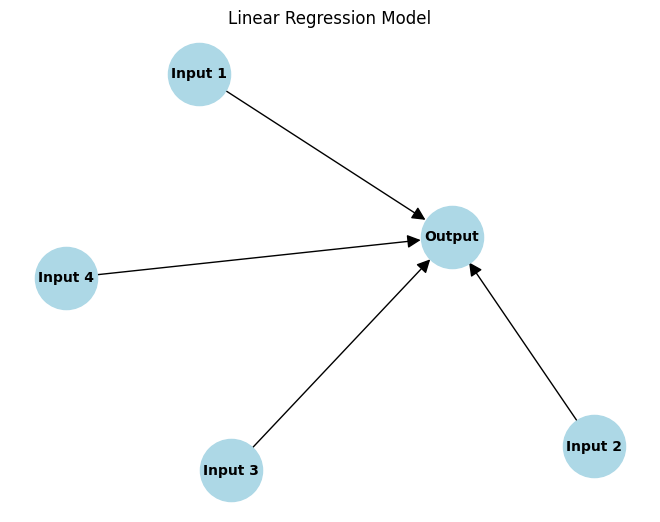

In [6]:
import matplotlib.pyplot as plt
import networkx as nx

def plot_linear_regression_model(input_size):
    G = nx.DiGraph()

    # Adding nodes for input layer
    for i in range(input_size):
        G.add_node(f'Input {i+1}')

    # Adding node for output layer
    G.add_node('Output')

    # Adding edges between input and output nodes
    for i in range(input_size):
        G.add_edge(f'Input {i+1}', 'Output')

    pos = nx.spring_layout(G, seed=42)  # positions for all nodes
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=10, font_weight='bold', arrowsize=20)
    plt.title('Linear Regression Model')
    plt.show()

# Define the input size
input_size = 4  # Iris dataset has 4 features
plot_linear_regression_model(input_size)


In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
data = iris.data
targets = iris.target

# Standardize the dataset
scaler = StandardScaler()
data = scaler.fit_transform(data)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data, targets, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)

# Create DataLoader for training and test sets
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=False)

# Define the Logistic Regression Model
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, x):
        return self.linear(x)

# Instantiate the model
input_size = X_train.shape[1]
num_classes = len(set(iris.target))
model = LogisticRegressionModel(input_size, num_classes)

# Specify the Loss Function and Optimizer
criterion = nn.CrossEntropyLoss()  # Cross-Entropy Loss for multi-class classification
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Train the Model
num_epochs = 100

for epoch in range(num_epochs):
    for data, target in train_loader:
        # Forward pass
        outputs = model(data)
        loss = criterion(outputs, target)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the Model
model.eval()
with torch.no_grad():
    outputs = model(X_test)
    _, predicted = torch.max(outputs.data, 1)
    accuracy = accuracy_score(y_test.numpy(), predicted.numpy())
    print(f'Accuracy: {accuracy * 100:.2f}%')


Epoch [10/100], Loss: 0.9406
Epoch [20/100], Loss: 0.8358
Epoch [30/100], Loss: 0.7614
Epoch [40/100], Loss: 0.5872
Epoch [50/100], Loss: 0.5835
Epoch [60/100], Loss: 0.5358
Epoch [70/100], Loss: 0.4957
Epoch [80/100], Loss: 0.5711
Epoch [90/100], Loss: 0.4128
Epoch [100/100], Loss: 0.6218
Accuracy: 93.33%
